In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import scipy
from pathlib import Path

import matplotlib.pyplot as plt
from sklearn.cluster import k_means, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns

In [2]:
import sys

sys.path.append("../src")

In [3]:
from core import SITE_NAMES
from calls import plot_call_features, compute_features


random_state_for_sites = {'Foliage':800, 'Carp':0, 'Central':0, 'Telephone':0}
color_for_groups = {0: 'blue', 1: 'red', 2:'limegreen'}
label_for_groups = {0: 'LF1', 1: 'HF1', 2:'HF2'}

NUM_CLUSTERS = 2

In [5]:
site_key = 'Carp'
input_dir = Path(f'../data/detected_calls/{site_key}')
output_dir = Path(f'../data/generated_welch/{site_key}')
if not(output_dir.is_dir()):
    output_dir.mkdir(parents=True)
input_file_type = 'top1_inbouts_call_signals'
output_file_type = 'top1_inbouts_welch_signals'

location_call_signals = np.load(input_dir / f'2022_{site_key}_{input_file_type}.npy', allow_pickle=True)
location_calls_sampled = pd.read_csv(input_dir / f'2022_{site_key}_{input_file_type}.csv', index_col=0, low_memory=False)
location_calls_sampled['index_in_file'] = location_calls_sampled['index']
location_calls_sampled['index'] = location_calls_sampled.index

snr_thresh = 10
good_snr_location_calls_sampled = location_calls_sampled.loc[location_calls_sampled['SNR']>=snr_thresh].copy()
good_snr_location_calls_sampled.reset_index(drop=True, inplace=True)
good_snr_location_calls_sampled


,index,bout_index,SD_card,file_name,site,SNR,sampling_rate,index_in_file
0,0,0,8,20220713_043000.WAV,Carp Pond,20.382066,250000,0
1,2,0,8,20220713_050000.WAV,Carp Pond,16.753371,250000,0
2,3,1,8,20220713_050000.WAV,Carp Pond,23.412185,250000,0
3,4,1,8,20220713_050000.WAV,Carp Pond,23.485646,250000,1
4,7,4,8,20220713_050000.WAV,Carp Pond,19.524419,250000,0
...,...,...,...,...,...,...,...,...
28009,42300,4,10,20221017_073000.WAV,Carp Pond,17.705028,192000,0
28010,42301,0,10,20221017_113000.WAV,Carp Pond,24.952015,192000,0
28011,42302,0,10,20221017_133000.WAV,Carp Pond,30.065039,192000,0
28012,42303,1,10,20221017_133000.WAV,Carp Pond,20.414923,192000,0


In [6]:
location_calls_sampled

,index,bout_index,SD_card,file_name,site,SNR,sampling_rate,index_in_file
0,0,0,8,20220713_043000.WAV,Carp Pond,20.382066,250000,0
1,1,1,8,20220713_043000.WAV,Carp Pond,6.535835,250000,0
2,2,0,8,20220713_050000.WAV,Carp Pond,16.753371,250000,0
3,3,1,8,20220713_050000.WAV,Carp Pond,23.412185,250000,0
4,4,1,8,20220713_050000.WAV,Carp Pond,23.485646,250000,1
...,...,...,...,...,...,...,...,...
42302,42302,0,10,20221017_133000.WAV,Carp Pond,30.065039,192000,0
42303,42303,1,10,20221017_133000.WAV,Carp Pond,20.414923,192000,0
42304,42304,2,10,20221017_133000.WAV,Carp Pond,8.031575,192000,0
42305,42305,3,10,20221017_133000.WAV,Carp Pond,6.670919,192000,0


In [ ]:

welch_signals = compute_features.generate_welchs_for_calls(good_snr_location_calls_sampled, location_call_signals)
welch_data = pd.DataFrame(welch_signals, columns=np.linspace(0, 96000, welch_signals.shape[1]).astype(int))
welch_data.index.name = 'Call #'
welch_data.columns.name = 'Frequency (kHz)'
welch_data.to_csv(output_dir / f'2022_{site_key}_{output_file_type}.csv')

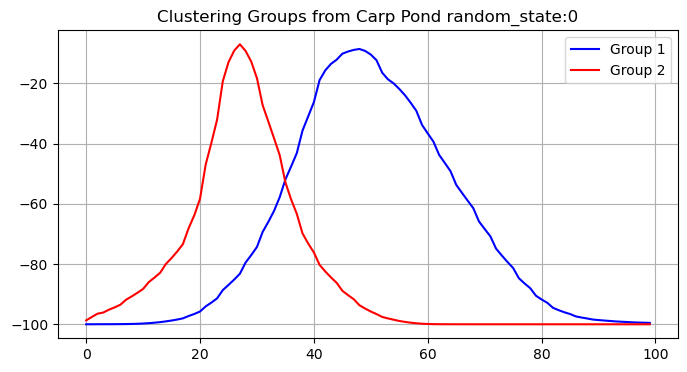

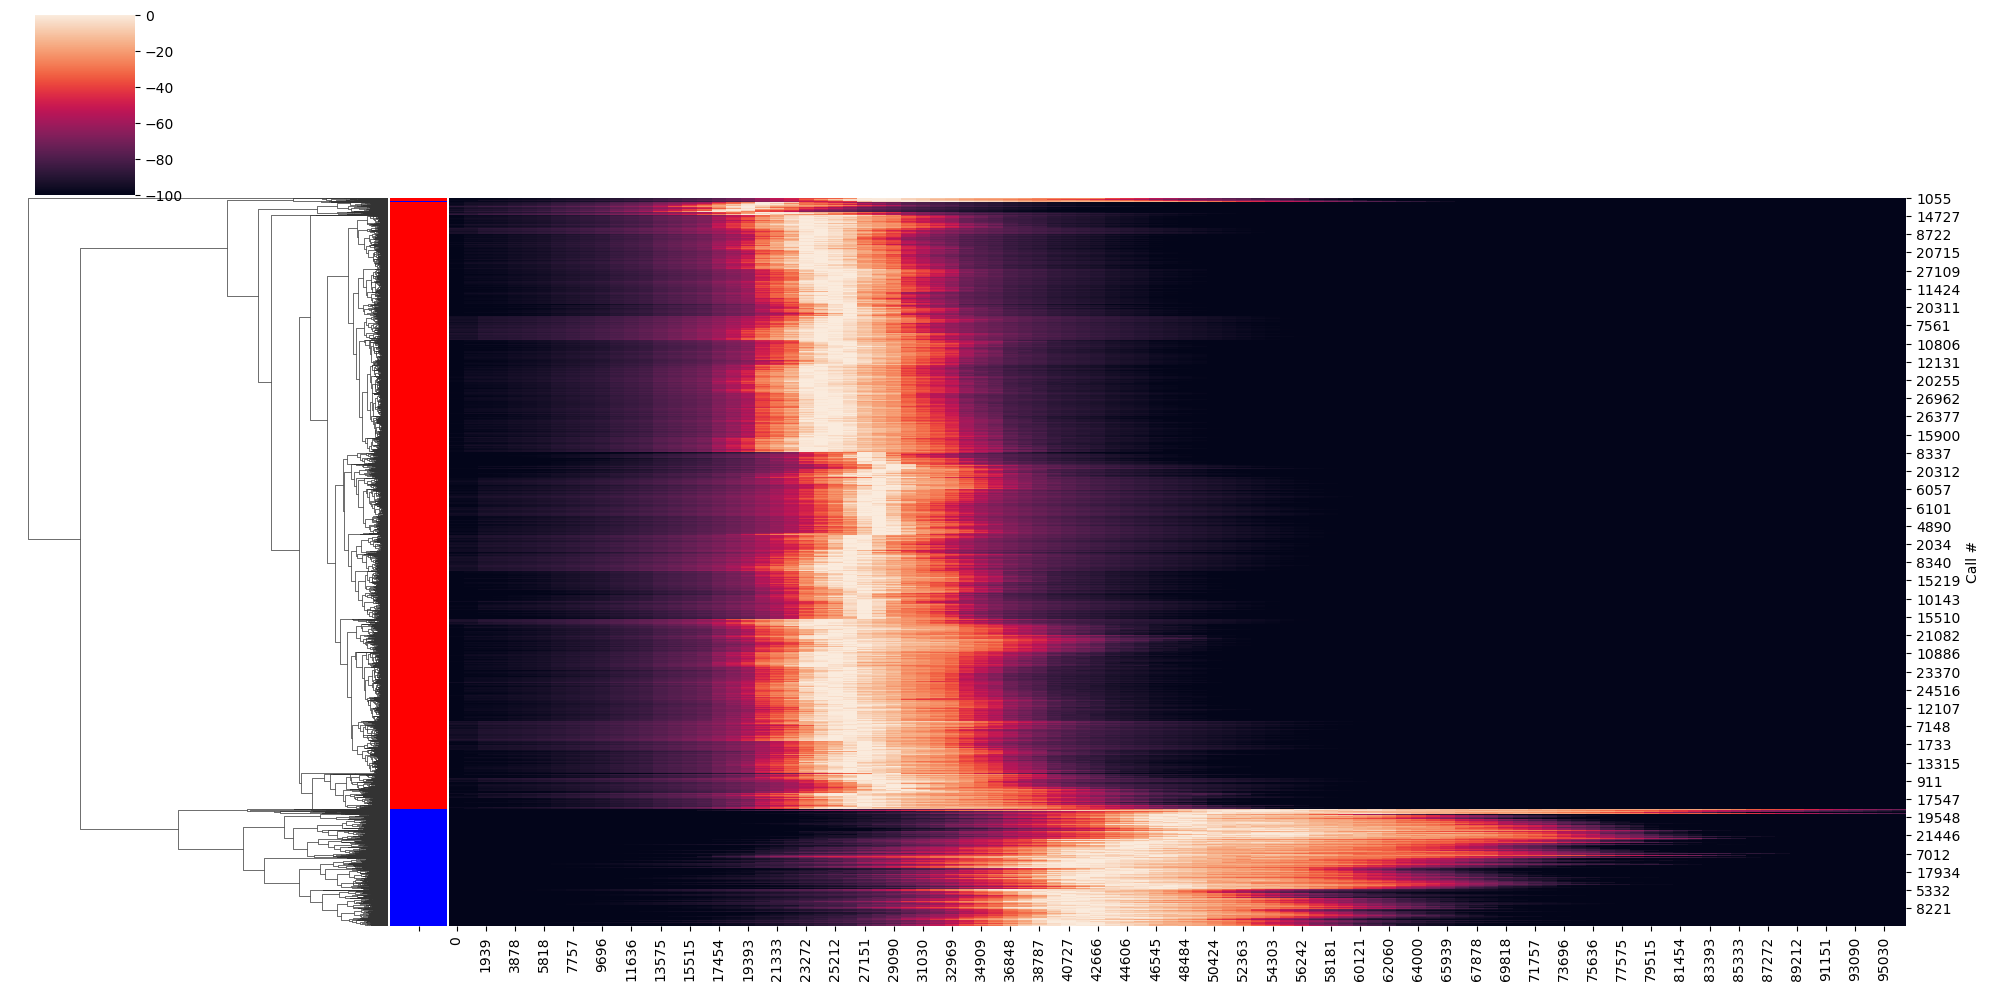

In [5]:
welch_data = pd.read_csv(output_dir / f'2022_{site_key}_{output_file_type}.csv', index_col=0, low_memory=False)

kmean_welch = KMeans(n_clusters=NUM_CLUSTERS, n_init=10, random_state=random_state_for_sites[site_key]).fit(welch_data)
plt.figure(figsize=(8, 4))
plt.title(f'Clustering Groups from {SITE_NAMES[site_key]} random_state:{random_state_for_sites[site_key]}')
for i in range(NUM_CLUSTERS):
    plt.plot(kmean_welch.cluster_centers_[i], label=f'Group {i+1}', color=color_for_groups[i])
plt.grid(which='both')
plt.legend()
plt.show()

groups = pd.Series(kmean_welch.labels_)
groups_to_labels = groups.map(label_for_groups)
groups_to_colors = groups.map(color_for_groups)
sns.clustermap(welch_data, figsize=(20, 10), col_cluster=False, row_colors=groups_to_colors)

In [6]:
site_key = 'Central'
input_dir = Path(f'../data/detected_calls/{site_key}')
output_dir = Path(f'../data/generated_welch/{site_key}')
if not(output_dir.is_dir()):
    output_dir.mkdir(parents=True)
input_file_type = 'top1_inbouts_call_signals'
output_file_type = 'top1_inbouts_welch_signals'

location_call_signals = np.load(input_dir / f'2022_{site_key}_{input_file_type}.npy', allow_pickle=True)
location_calls_sampled = pd.read_csv(input_dir / f'2022_{site_key}_{input_file_type}.csv', index_col=0, low_memory=False)
location_calls_sampled['index_in_file'] = location_calls_sampled['index']
location_calls_sampled['index'] = location_calls_sampled.index

snr_thresh = 10
good_snr_location_calls_sampled = location_calls_sampled.loc[location_calls_sampled['SNR']>=snr_thresh].copy()
good_snr_location_calls_sampled.reset_index(drop=True, inplace=True)
good_snr_location_calls_sampled

welch_signals = compute_features.generate_welchs_for_calls(good_snr_location_calls_sampled, location_call_signals)
welch_data = pd.DataFrame(welch_signals, columns=np.linspace(0, 96000, welch_signals.shape[1]).astype(int))
welch_data.index.name = 'Call #'
welch_data.columns.name = 'Frequency (kHz)'
welch_data.to_csv(output_dir / f'2022_{site_key}_{output_file_type}.csv')

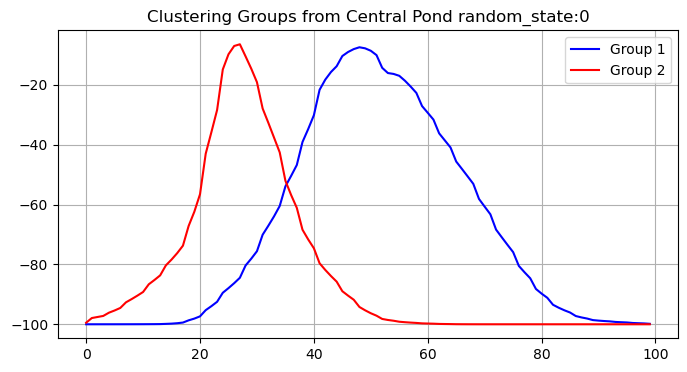

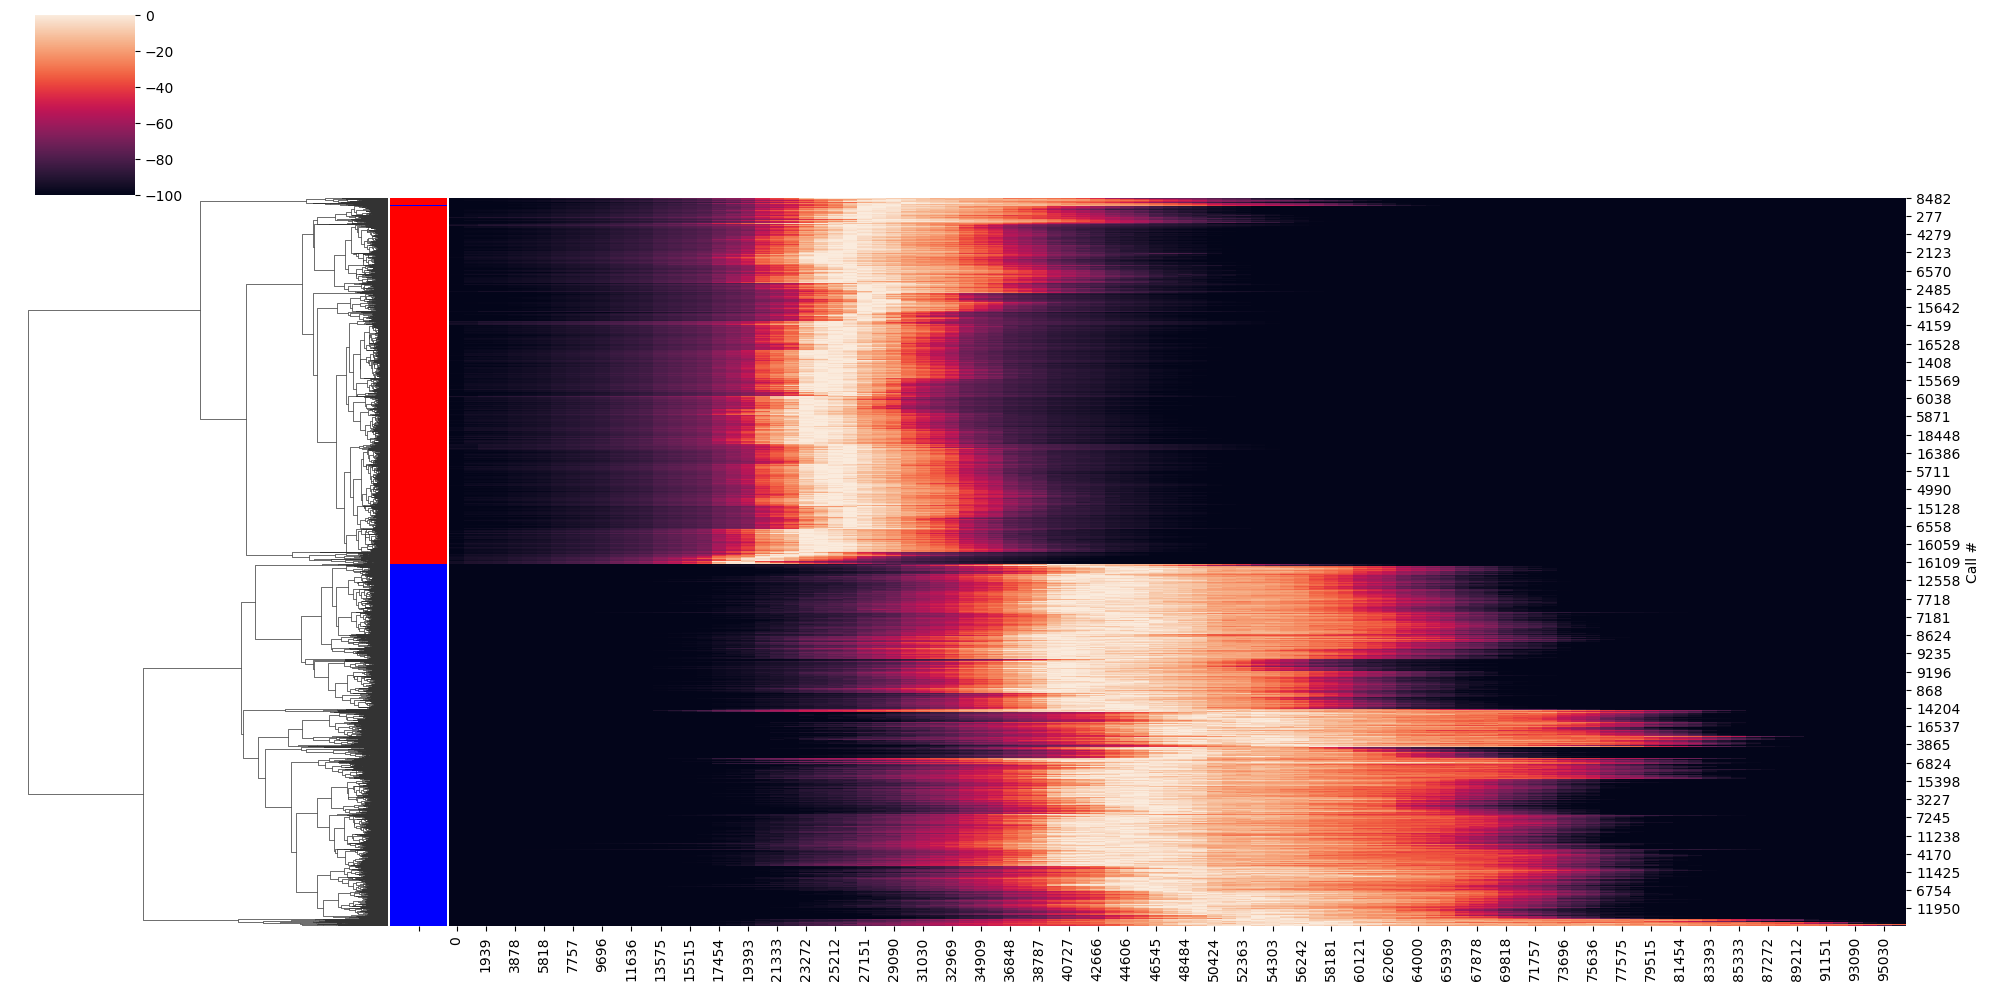

In [7]:
welch_data = pd.read_csv(output_dir / f'2022_{site_key}_{output_file_type}.csv', index_col=0, low_memory=False)

kmean_welch = KMeans(n_clusters=NUM_CLUSTERS, n_init=10, random_state=random_state_for_sites[site_key]).fit(welch_data)
plt.figure(figsize=(8, 4))
plt.title(f'Clustering Groups from {SITE_NAMES[site_key]} random_state:{random_state_for_sites[site_key]}')
for i in range(NUM_CLUSTERS):
    plt.plot(kmean_welch.cluster_centers_[i], label=f'Group {i+1}', color=color_for_groups[i])
plt.grid(which='both')
plt.legend()
plt.show()

groups = pd.Series(kmean_welch.labels_)
groups_to_labels = groups.map(label_for_groups)
groups_to_colors = groups.map(color_for_groups)
sns.clustermap(welch_data, figsize=(20, 10), col_cluster=False, row_colors=groups_to_colors)

In [8]:
site_key = 'Foliage'
input_dir = Path(f'../data/detected_calls/{site_key}')
output_dir = Path(f'../data/generated_welch/{site_key}')
if not(output_dir.is_dir()):
    output_dir.mkdir(parents=True)
input_file_type = 'top1_inbouts_call_signals'
output_file_type = 'top1_inbouts_welch_signals'

location_call_signals = np.load(input_dir / f'2022_{site_key}_{input_file_type}.npy', allow_pickle=True)
location_calls_sampled = pd.read_csv(input_dir / f'2022_{site_key}_{input_file_type}.csv', index_col=0, low_memory=False)
location_calls_sampled['index_in_file'] = location_calls_sampled['index']
location_calls_sampled['index'] = location_calls_sampled.index

snr_thresh = 10
good_snr_location_calls_sampled = location_calls_sampled.loc[location_calls_sampled['SNR']>=snr_thresh].copy()
good_snr_location_calls_sampled.reset_index(drop=True, inplace=True)
good_snr_location_calls_sampled

welch_signals = compute_features.generate_welchs_for_calls(good_snr_location_calls_sampled, location_call_signals)
welch_data = pd.DataFrame(welch_signals, columns=np.linspace(0, 96000, welch_signals.shape[1]).astype(int))
welch_data.index.name = 'Call #'
welch_data.columns.name = 'Frequency (kHz)'
welch_data.to_csv(output_dir / f'2022_{site_key}_{output_file_type}.csv')

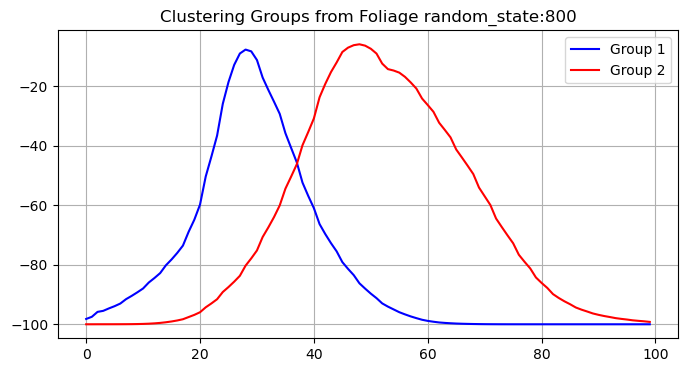

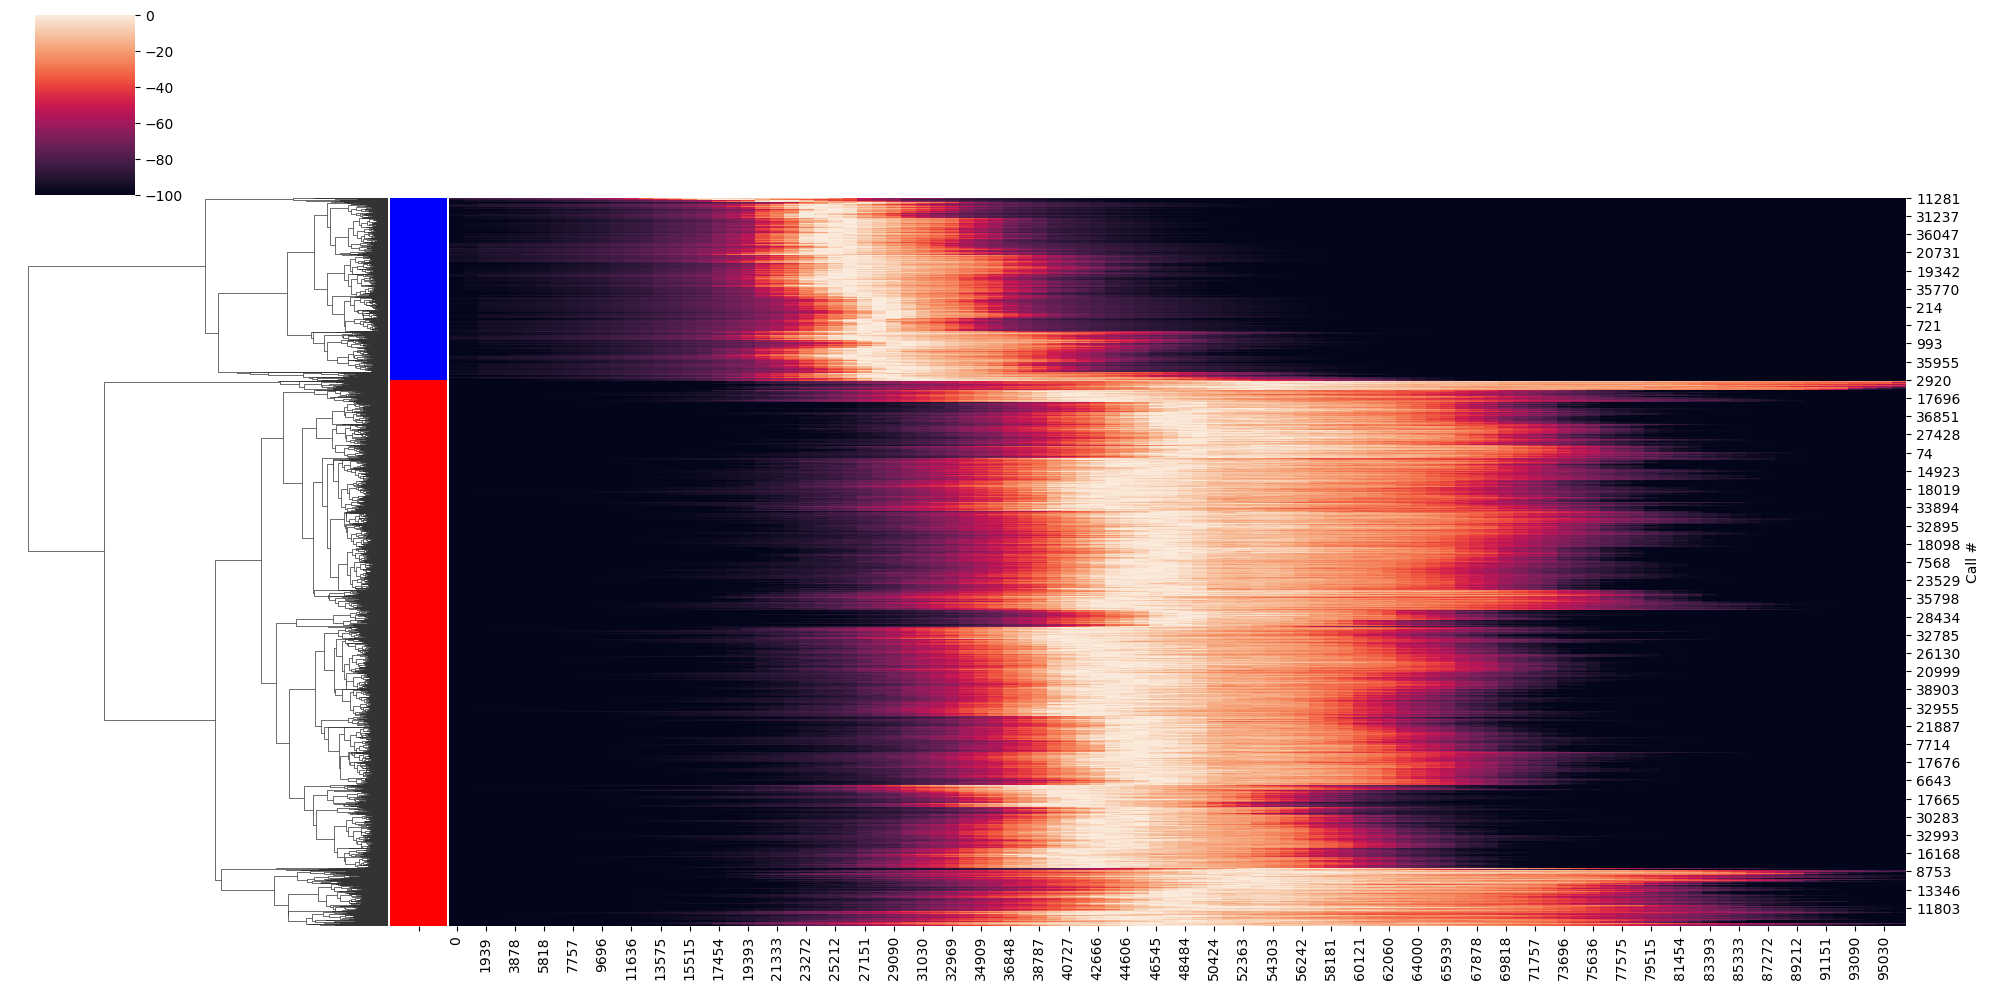

In [9]:
welch_data = pd.read_csv(output_dir / f'2022_{site_key}_{output_file_type}.csv', index_col=0, low_memory=False)

kmean_welch = KMeans(n_clusters=NUM_CLUSTERS, n_init=10, random_state=random_state_for_sites[site_key]).fit(welch_data)
plt.figure(figsize=(8, 4))
plt.title(f'Clustering Groups from {SITE_NAMES[site_key]} random_state:{random_state_for_sites[site_key]}')
for i in range(NUM_CLUSTERS):
    plt.plot(kmean_welch.cluster_centers_[i], label=f'Group {i+1}', color=color_for_groups[i])
plt.grid(which='both')
plt.legend()
plt.show()

groups = pd.Series(kmean_welch.labels_)
groups_to_labels = groups.map(label_for_groups)
groups_to_colors = groups.map(color_for_groups)
sns.clustermap(welch_data, figsize=(20, 10), col_cluster=False, row_colors=groups_to_colors)

In [10]:
site_key = 'Telephone'
input_dir = Path(f'../data/detected_calls/{site_key}')
output_dir = Path(f'../data/generated_welch/{site_key}')
if not(output_dir.is_dir()):
    output_dir.mkdir(parents=True)
input_file_type = 'top1_inbouts_call_signals'
output_file_type = 'top1_inbouts_welch_signals'

location_call_signals = np.load(input_dir / f'2022_{site_key}_{input_file_type}.npy', allow_pickle=True)
location_calls_sampled = pd.read_csv(input_dir / f'2022_{site_key}_{input_file_type}.csv', index_col=0, low_memory=False)
location_calls_sampled['index_in_file'] = location_calls_sampled['index']
location_calls_sampled['index'] = location_calls_sampled.index

snr_thresh = 10
good_snr_location_calls_sampled = location_calls_sampled.loc[location_calls_sampled['SNR']>=snr_thresh].copy()
good_snr_location_calls_sampled.reset_index(drop=True, inplace=True)
good_snr_location_calls_sampled

welch_signals = compute_features.generate_welchs_for_calls(good_snr_location_calls_sampled, location_call_signals)
welch_data = pd.DataFrame(welch_signals, columns=np.linspace(0, 96000, welch_signals.shape[1]).astype(int))
welch_data.index.name = 'Call #'
welch_data.columns.name = 'Frequency (kHz)'
welch_data.to_csv(output_dir / f'2022_{site_key}_{output_file_type}.csv')

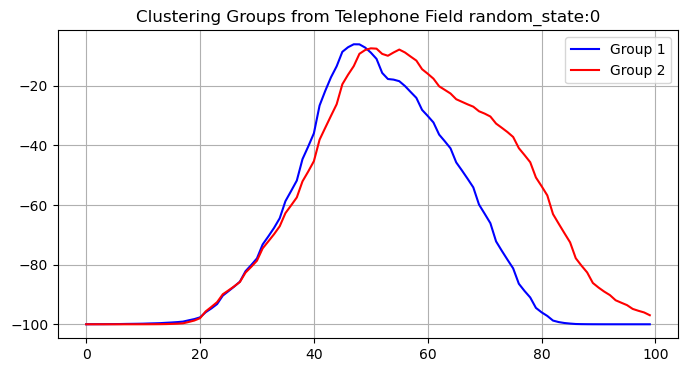

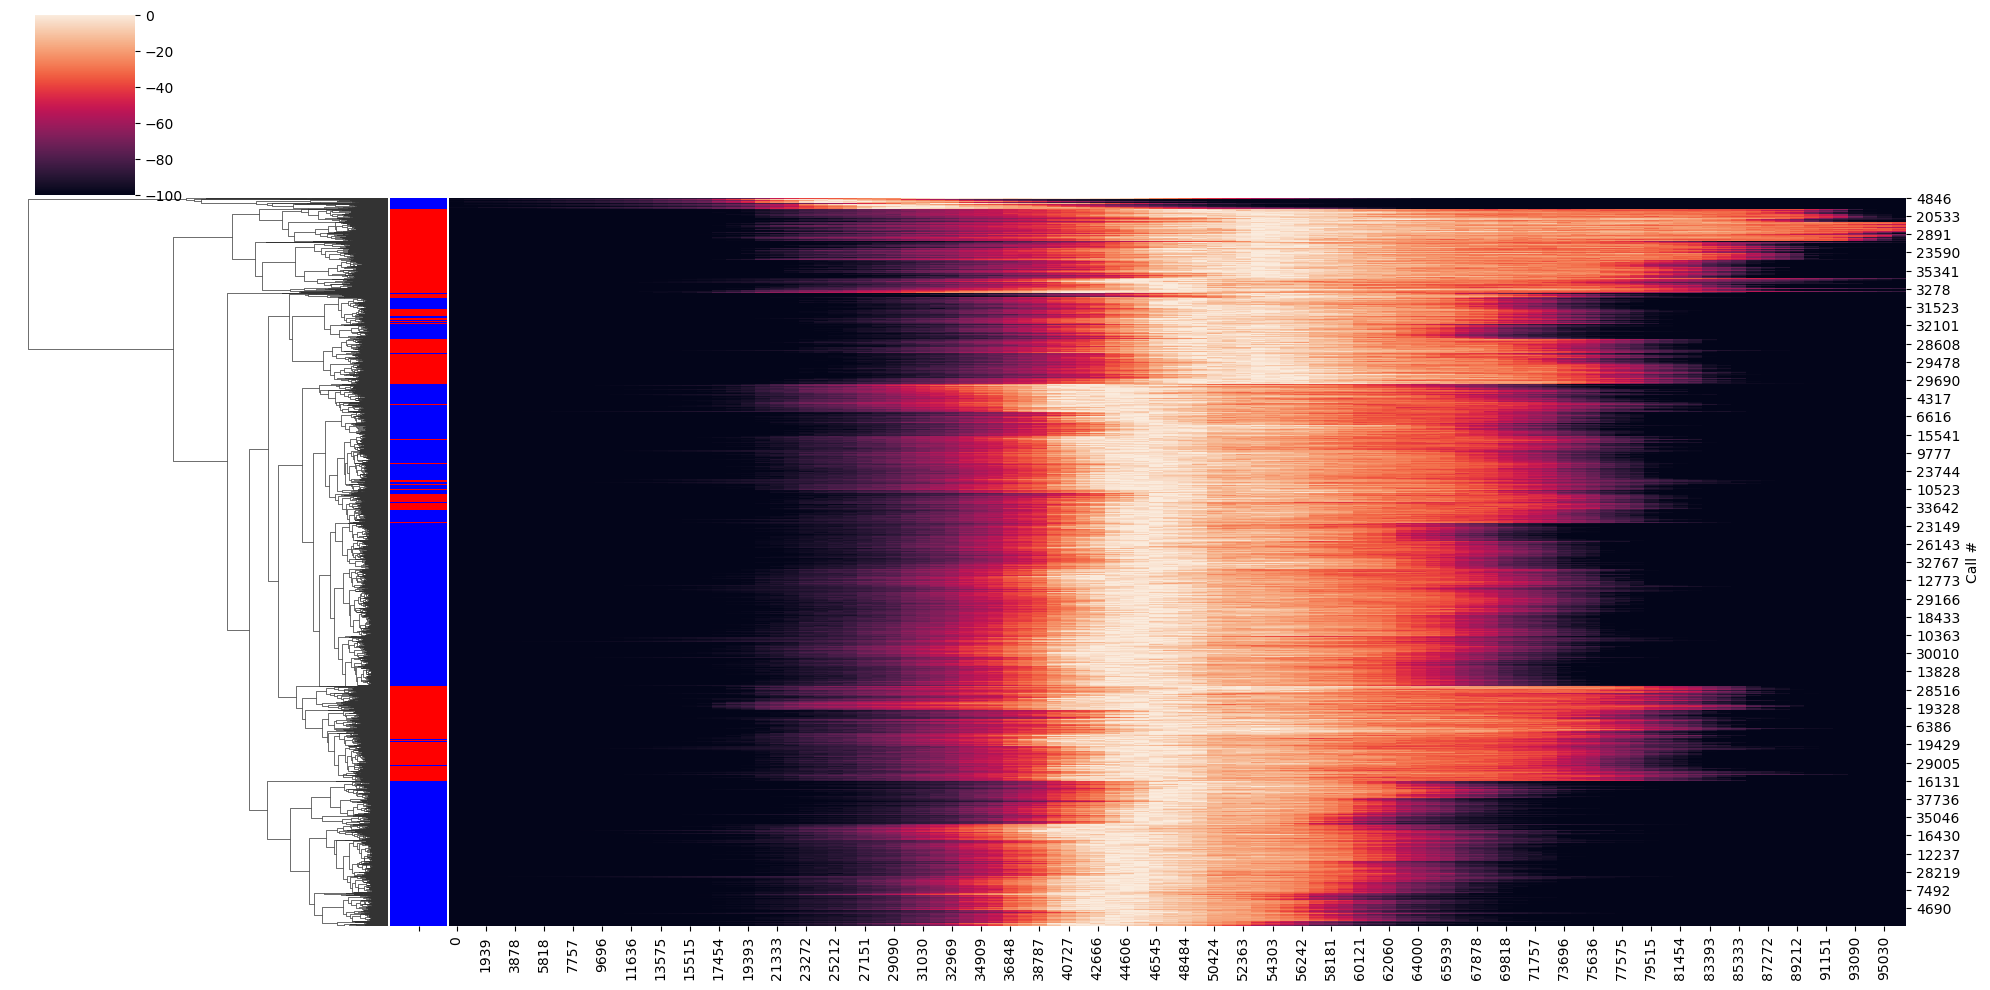

In [11]:
welch_data = pd.read_csv(output_dir / f'2022_{site_key}_{output_file_type}.csv', index_col=0, low_memory=False)

kmean_welch = KMeans(n_clusters=NUM_CLUSTERS, n_init=10, random_state=random_state_for_sites[site_key]).fit(welch_data)
plt.figure(figsize=(8, 4))
plt.title(f'Clustering Groups from {SITE_NAMES[site_key]} random_state:{random_state_for_sites[site_key]}')
for i in range(NUM_CLUSTERS):
    plt.plot(kmean_welch.cluster_centers_[i], label=f'Group {i+1}', color=color_for_groups[i])
plt.grid(which='both')
plt.legend()
plt.show()

groups = pd.Series(kmean_welch.labels_)
groups_to_labels = groups.map(label_for_groups)
groups_to_colors = groups.map(color_for_groups)
sns.clustermap(welch_data, figsize=(20, 10), col_cluster=False, row_colors=groups_to_colors)